In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_start = dt.date(2010, 6, 1)
june_end = dt.date(2017, 6, 30)
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= june_start).\
    filter(Measurement.date <= june_end).all()
print(june_results)


[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2010-07-01', 75.0), ('2010-07-02', 77.0), ('2010-07-03', 77.0), ('2010-07-04', 78.0), ('2010-07-05', 78.0), ('2010-07-06', 76.0), ('2010-07-07', 74.0), ('2010-07-08', 76.0), ('2010-07-09', 74.0), ('2010-07-10', 76.0), ('2010-07-11', 78.0), ('2010-07-12', 77.0), ('2010-07-13', 80.0), ('2010-07-16', 78.0), ('2010-07-17', 76.0), ('2010-07

In [5]:
#  3. Convert the June temperatures to a list.
june_temp = list(june_results)
june_temp

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2010-07-01', 75.0),
 ('2010-07-02', 77.0),
 ('2010-07-03', 77.0),
 ('2010-07-04', 78.0),
 ('2010-07-05', 78.0),
 ('2010-07-06', 76.0),
 ('2010-07-07', 74.0),
 ('2010-07-08', 76.0),
 ('2010-07-09', 74.0),
 ('2010-07-10', 76.0),
 ('2010-07-11', 78.0),
 ('2010-07-12', 77.0),
 ('2010-07-13', 80.0),
 ('2010-07-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns=['date', 'temperature'])
june_df['June'] = june_df['date'].str.extract(r'(\d{4}.06.\d{2})')
june_df.dropna(inplace=True)
del june_df['June']


june_df.head(60)


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
5,2010-06-06,78.0
6,2010-06-07,77.0
7,2010-06-08,78.0
8,2010-06-09,78.0
9,2010-06-10,79.0


In [39]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

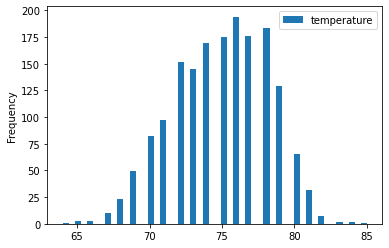

In [40]:
june_df.plot.hist(bins=50)

## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_start = dt.date(2010, 12, 1)
dec_end = dt.date(2017, 12, 30)
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= dec_start).\
    filter(Measurement.date <= dec_end).all()
print(dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-01-01', 69.0), ('2011-01-02', 72.0), ('2011-01-03', 74.0), ('2011-01-04', 73.0), ('2011-01-05', 64.0), ('2011-01-06', 65.0), ('2011-01-07', 68.0), ('2011-01-08', 62.0), ('2011-01-09', 58.0), ('2011-01-10', 73.0), ('2011-01-11', 60.0), ('2011-01-13', 68.0), ('2011-01-14', 76.0), ('2011-01-15', 68.0), ('2011-01-16', 66.0), ('2011-01-17', 64.0), ('2011-01-18', 64.0), ('2011-01-19', 64.0), ('2011-01-20', 76.0), ('2011-01-21', 75.0), ('2011-01

In [9]:
# 7. Convert the December temperatures to a list.
dec_temp = list(dec_results)
dec_temp

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-01-01', 69.0),
 ('2011-01-02', 72.0),
 ('2011-01-03', 74.0),
 ('2011-01-04', 73.0),
 ('2011-01-05', 64.0),
 ('2011-01-06', 65.0),
 ('2011-01-07', 68.0),
 ('2011-01-08', 62.0),
 ('2011-01-09', 58.0),
 ('2011-01-10', 73.0),
 ('2011-01-11', 60.0),
 ('2011-01-13', 68.0),
 ('2011-01-14', 76.0),
 ('2011-01-15', 68.0),
 ('2011-01-16', 66.0),
 ('2011-01-17', 64.0),
 ('2011-01-18', 64.0),
 ('2011-01-19', 64.0),
 ('2011-01-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp, columns=['date', 'temperature'])
dec_df['Dec'] = dec_df['date'].str.extract(r'(\d{4}.12.\d{2})')
dec_df.dropna(inplace=True)
del dec_df['Dec']


dec_df.head(60)

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [41]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

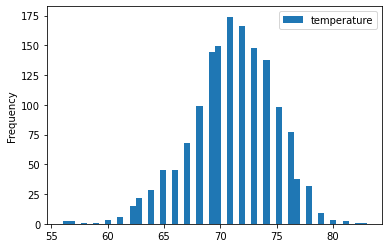

In [42]:
dec_df.plot.hist(bins=50)

In [12]:
# !git add .
# !git commit -m "Challenge Deliverable 2 completed"
# !git push

In [34]:
#two more queries
#precipitation in June
june_prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= june_start).\
    filter(Measurement.date <= june_end).all()
june_prcp_temp = list(june_prcp_results)
june_prcp_df = pd.DataFrame(june_prcp_temp, columns=['date', 'precipitation'])
june_prcp_df['June'] = june_prcp_df['date'].str.extract(r'(\d{4}.06.\d{2})')
june_prcp_df.dropna(inplace=True)
del june_prcp_df['June']


june_prcp_df.describe()


,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:ylabel='Frequency'>

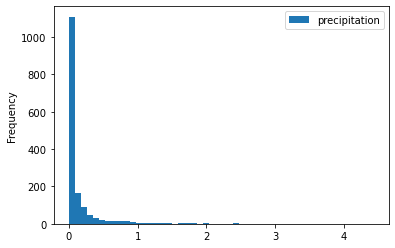

In [37]:
june_prcp_df.plot.hist(bins=50)

In [33]:
#precipitation in Dec
dec_prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= dec_start).\
    filter(Measurement.date <= dec_end).all()
dec_prcp_temp = list(dec_prcp_results)
dec_prcp_df = pd.DataFrame(dec_prcp_temp, columns=['date', 'precipitation'])
dec_prcp_df['Dec'] = dec_prcp_df['date'].str.extract(r'(\d{4}.12.\d{2})')
dec_prcp_df.dropna(inplace=True)
del dec_prcp_df['Dec']

dec_prcp_df.describe()



,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:ylabel='Frequency'>

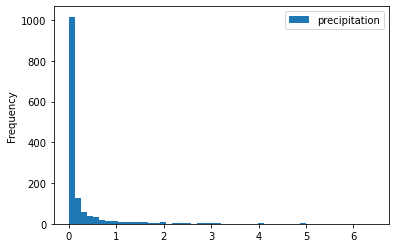

In [38]:
dec_prcp_df.plot.hist(bins=50)

In [ ]:
!git add .
!git commit -m "Challenge Deliverable 3 completed"
!git push